In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mutual_info_score
from itertools import combinations, product
from scipy.stats import chi2_contingency

10 times

In [2]:
class NW:
    def __init__(self, num_bins=10, num_boot=10):
        self.num_bins = num_bins
        self.num_boot = num_boot

    def discretize_features(self, data):
        if data.isnull().values.any():
            print("Warning: Data contains NaN values. These will be ignored during binning.")
            data = data.dropna()

        discretizer = KBinsDiscretizer(n_bins=self.num_bins, encode='ordinal', strategy='uniform')
        discretized_data = discretizer.fit_transform(data)
        
        # print("Unique values per feature after discretization:")
        # for i, col in enumerate(data.columns):
        #     print(f"{col}: {np.unique(discretized_data[:, i])}")

        return pd.DataFrame(discretized_data, columns=data.columns)

    def chi_square_test(self, data, group1_features, group2_features):
        chi2_values = {}
        p_values = {}
        feature_pairs = product(group1_features, group2_features)

        for feature1, feature2 in feature_pairs:
            if feature1 in data.columns and feature2 in data.columns:
                contingency_table = pd.crosstab(data[feature1], data[feature2])
                
                chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
                
                chi2_values[(feature1, feature2)] = chi2_stat
                p_values[(feature1, feature2)] = p_val
            else:
                chi2_values[(feature1, feature2)] = 'Error: Feature not in DataFrame'
                p_values[(feature1, feature2)] = 'Error: Feature not in DataFrame'

        return chi2_values, p_values

    # def bootstrap_iteration(self, data, group1_features, group2_features):
    #     bootstrap_sample = data.sample(frac=1, replace=True, random_state=np.random.RandomState())
    #     return self.chi_square_test(bootstrap_sample, group1_features, group2_features)

    # def bootstrap(self, data, group1_features, group2_features):
    #     original_chi2, original_p_values = self.chi_square_test(data, group1_features, group2_features)
    #     bootstrap_chi2s = {edge: [] for edge in original_chi2.keys()}

    #     for _ in range(self.num_boot):
    #         chi2_values, _ = self.bootstrap_iteration(data, group1_features, group2_features)
    #         for edge, chi2_val in chi2_values.items():
    #             bootstrap_chi2s[edge].append(chi2_val)

    #     p_values = {}
    #     ci_intervals = {}  # onfidence intervals
    #     for edge, chi2_distribution in bootstrap_chi2s.items():
    #         original_chi2_value = original_chi2[edge]

    #         p_value = (np.sum(np.array(chi2_distribution) >= original_chi2_value) + 1) / (self.num_boot + 1)
    #         p_values[edge] = {'feat1': edge[0], 'feat2': edge[1], 'p-val': p_value}

    #         # CI- basic method
    #         lower_ci = np.percentile(chi2_distribution, 2.5)
    #         upper_ci = np.percentile(chi2_distribution, 97.5)
    #         ci_intervals[edge] = (lower_ci, upper_ci)

    #     return original_chi2, original_p_values, p_values, ci_intervals
    

In [3]:
net = NW(num_bins=10, num_boot=10)
data = pd.read_csv('data/cleaning data/participant_combined.csv', delimiter=',')
data.drop(columns=['eid', 'Date_of_attending_assessment_centre', 'X34.0.0', 'Gender', 'Ethnicity', 'Migrant.Status', 'TDI.Tertiles', 'Highest.Qualification', 'House.Ownership', 'Income', 'Cohabiting', 'Living.Alone', 'AUDIT.Score', 'Smoker', 'Moderate.Physical.Activity', 'Longstanding.Illness', 'Diabetes', 'Cancer'], inplace=True, errors='ignore')
# data.to_csv('data/cleaning data/OG_data1.csv', index=False)
discrete_data = net.discretize_features(data.dropna())
# print(discrete_data)
# discrete_data.to_csv('data/cleaning data/discrete_data1.csv', index=False)

values = {
    'Depression_group': ['Depressed.At.Baseline', 'Loneliness', 'Social.Isolation', 'PHQ9.No.Info', 'PHQ9.Screen', 'PHQ9.Items', 'PHQ9.Severity', 'CIDI.MDD.No.Info', 'CIDI.MDD.Screen', 'CIDI.MDD.Response', 'CIDI.MDD.Severity', 'GAD.CIDI.Somatic'],
    'CVD_group' : ['CVD'],
    'NMR_group' : [
        'Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesterol_in_IDL', 'Cholesterol_in_Large_HDL', 'Cholesterol_in_Large_LDL', 'Cholesterol_in_Large_VLDL', 'Cholesterol_in_Medium_HDL', 'Cholesterol_in_Medium_LDL', 'Cholesterol_in_Medium_VLDL', 'Cholesterol_in_Small_HDL', 'Cholesterol_in_Small_LDL', 'Cholesterol_in_Small_VLDL', 'Cholesterol_in_Very_Large_HDL', 'Cholesterol_in_Very_Large_VLDL', 'Cholesterol_in_Very_Small_VLDL', 'Clinical_LDL_Cholesterol', 'HDL_Cholesterol', 'LDL_Cholesterol', 'Remnant_Cholesterol_(Non-HDL,_Non-LDL_-Cholesterol)', 'Total_Cholesterol', 'Total_Cholesterol_Minus_HDL-C', 'Total_Concentration_of_Lipoprotein_Particles', 'Total_Esterified_Cholesterol', 'VLDL_Cholesterol',
        'Cholesteryl_Esters_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesteryl_Esters_in_HDL', 'Cholesteryl_Esters_in_IDL', 'Cholesteryl_Esters_in_Large_HDL', 'Cholesteryl_Esters_in_Large_LDL', 'Cholesteryl_Esters_in_Large_VLDL', 'Cholesteryl_Esters_in_LDL', 'Cholesteryl_Esters_in_Medium_HDL', 'Cholesteryl_Esters_in_Medium_LDL', 'Cholesteryl_Esters_in_Medium_VLDL', 'Cholesteryl_Esters_in_Small_HDL', 'Cholesteryl_Esters_in_Small_LDL', 'Cholesteryl_Esters_in_Small_VLDL', 'Cholesteryl_Esters_in_Very_Large_HDL', 'Cholesteryl_Esters_in_Very_Large_VLDL', 'Cholesteryl_Esters_in_Very_Small_VLDL', 'Cholesteryl_Esters_in_VLDL',
        'Concentration_of_Chylomicrons_and_Extremely_Large_VLDL_Particles', 'Concentration_of_HDL_Particles', 'Concentration_of_IDL_Particles', 'Concentration_of_Large_HDL_Particles', 'Concentration_of_Large_LDL_Particles', 'Concentration_of_Large_VLDL_Particles', 'Concentration_of_LDL_Particles', 'Concentration_of_Medium_HDL_Particles', 'Concentration_of_Medium_LDL_Particles', 'Concentration_of_Medium_VLDL_Particles', 'Concentration_of_Small_HDL_Particles', 'Concentration_of_Small_LDL_Particles', 'Concentration_of_Small_VLDL_Particles', 'Concentration_of_Very_Large_HDL_Particles', 'Concentration_of_Very_Large_VLDL_Particles', 'Concentration_of_Very_Small_VLDL_Particles', 'Concentration_of_VLDL_Particles', 
        'Free_Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Free_Cholesterol_in_HDL', 'Free_Cholesterol_in_IDL', 'Free_Cholesterol_in_Large_HDL', 'Free_Cholesterol_in_Large_LDL', 'Free_Cholesterol_in_Large_VLDL', 'Free_Cholesterol_in_LDL', 'Free_Cholesterol_in_Medium_HDL', 'Free_Cholesterol_in_Medium_LDL', 'Free_Cholesterol_in_Medium_VLDL', 'Free_Cholesterol_in_Small_HDL', 'Free_Cholesterol_in_Small_LDL', 'Free_Cholesterol_in_Small_VLDL', 'Free_Cholesterol_in_Very_Large_HDL', 'Free_Cholesterol_in_Very_Large_VLDL', 'Free_Cholesterol_in_Very_Small_VLDL', 'Free_Cholesterol_in_VLDL', 'Total_Free_Cholesterol',
        'Phospholipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Phospholipids_in_HDL', 'Phospholipids_in_IDL', 'Phospholipids_in_Large_HDL', 'Phospholipids_in_Large_LDL', 'Phospholipids_in_Large_VLDL', 'Phospholipids_in_LDL', 'Phospholipids_in_Medium_HDL', 'Phospholipids_in_Medium_LDL', 'Phospholipids_in_Medium_VLDL', 'Phospholipids_in_Small_HDL', 'Phospholipids_in_Small_LDL', 'Phospholipids_in_Small_VLDL', 'Phospholipids_in_Very_Large_HDL', 'Phospholipids_in_Very_Large_VLDL', 'Phospholipids_in_Very_Small_VLDL', 'Phospholipids_in_VLDL', 'Total_Phospholipids_in_Lipoprotein_Particles',
        'Total_Lipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Total_Lipids_in_HDL', 'Total_Lipids_in_IDL', 'Total_Lipids_in_Large_HDL', 'Total_Lipids_in_Large_LDL', 'Total_Lipids_in_Large_VLDL', 'Total_Lipids_in_LDL', 'Total_Lipids_in_Lipoprotein_Particles', 'Total_Lipids_in_Medium_HDL', 'Total_Lipids_in_Medium_LDL', 'Total_Lipids_in_Medium_VLDL', 'Total_Lipids_in_Small_HDL', 'Total_Lipids_in_Small_LDL', 'Total_Lipids_in_Small_VLDL', 'Total_Lipids_in_Very_Large_HDL', 'Total_Lipids_in_Very_Large_VLDL', 'Total_Lipids_in_Very_Small_VLDL', 'Total_Lipids_in_VLDL',
        'Total_Triglycerides', 'Triglycerides_in_Chylomicrons_and_Extremely_Large_VLDL', 'Triglycerides_in_HDL', 'Triglycerides_in_IDL', 'Triglycerides_in_Large_HDL', 'Triglycerides_in_Large_LDL', 'Triglycerides_in_Large_VLDL', 'Triglycerides_in_LDL', 'Triglycerides_in_Medium_HDL', 'Triglycerides_in_Medium_LDL', 'Triglycerides_in_Medium_VLDL', 'Triglycerides_in_Small_HDL', 'Triglycerides_in_Small_LDL', 'Triglycerides_in_Small_VLDL', 'Triglycerides_in_Very_Large_HDL', 'Triglycerides_in_Very_Large_VLDL', 'Triglycerides_in_Very_Small_VLDL', 'Triglycerides_in_VLDL',
        'Apolipoprotein_A1', 'Apolipoprotein_B', 'Average_Diameter_for_HDL_Particles', 'Average_Diameter_for_LDL_Particles', 'Average_Diameter_for_VLDL_Particles', 'Glycoprotein_Acetyls'
    ]
}


def results_to_dataframe(results, comparison, p_values=None, ci_intervals=None):
    df = pd.DataFrame(list(results.items()), columns=['Feature Pair', 'Chi-Square Statistic'])
    df['Comparison'] = comparison
    if p_values is not None:
        p_vals = [p_values.get(pair, np.nan) for pair in results.keys()]
        df['P-Value'] = p_vals
    if ci_intervals is not None:
        ci = [ci_intervals.get(pair, (np.nan, np.nan)) for pair in results.keys()]
        df['95% CI Lower'] = [x[0] for x in ci]
        df['95% CI Upper'] = [x[1] for x in ci]
    return df


depression_features = values['Depression_group']
cvd_features = values['CVD_group']
nmr_features = values['NMR_group']

final_df = pd.DataFrame()

for feature_set, comparison_label in [
    (('Depression_group', 'CVD_group'), 'Depression vs CVD'),
    (('Depression_group', 'NMR_group'), 'Depression vs NMR'),
    (('CVD_group', 'NMR_group'), 'CVD vs NMR')
]:
    group1_features, group2_features = values[feature_set[0]], values[feature_set[1]]
    chi2_values, p_values = net.chi_square_test(discrete_data, group1_features, group2_features)
    chi2_df = results_to_dataframe(chi2_values, comparison_label, p_values)
    final_df = pd.concat([final_df, chi2_df], ignore_index=True)

# Save combined results
final_df.to_csv('data/network results/combined_results_10.csv', index=False)
print("All results saved to a single CSV file.")


# bootstrap analysis
# combined_results_df = pd.read_csv('data/combined_results_100.csv')
# bootstrap_results = []

# for _, row in combined_results_df.iterrows():
#     feat1, feat2 = row['Feature Pair'].strip('()').split(', ')
#     feat1 = feat1.strip("'")
#     feat2 = feat2.strip("'")
#     comparison = row['Comparison']

#     # Determine feature groups based on comparison
#     if comparison == 'Depression vs CVD':
#         group1_features = values['Depression_group']
#         group2_features = values['CVD_group']
#     elif comparison == 'Depression vs NMR':
#         group1_features = values['Depression_group']
#         group2_features = values['NMR_group']
#     elif comparison == 'CVD vs NMR':
#         group1_features = values['CVD_group']
#         group2_features = values['NMR_group']
#     else:
#         continue  # Skip if comparison is not recognized

#     # Perform bootstrapping
#     _, _, p_values, ci_intervals = net.bootstrap(discrete_data, group1_features, group2_features)

#     # Extract the results for the current feature pair
#     if (feat1, feat2) in p_values:
#         result = {
#             'Feature Pair': f"('{feat1}', '{feat2}')",
#             'Comparison': comparison,
#             'Bootstrap P-Value': p_values[(feat1, feat2)]['p-val'],
#             'Bootstrap 95% CI Lower': ci_intervals[(feat1, feat2)][0],
#             'Bootstrap 95% CI Upper': ci_intervals[(feat1, feat2)][1]
#         }
#         bootstrap_results.append(result)

# # Convert to DataFrame and save
# bootstrap_results_df = pd.DataFrame(bootstrap_results)
# bootstrap_results_df.to_csv('data/bootstrap_combined_results.csv', index=False)
# print("Bootstrap results saved to CSV file.")

# ~ 2 min to run chi2 test
# ~ _ min to run bootstrap analysis

All results saved to a single CSV file.


100 times

In [4]:
class NW:
    def __init__(self, num_bins=10, num_boot=100):
        self.num_bins = num_bins
        self.num_boot = num_boot

    def discretize_features(self, data):
        if data.isnull().values.any():
            print("Warning: Data contains NaN values. These will be ignored during binning.")
            data = data.dropna()

        discretizer = KBinsDiscretizer(n_bins=self.num_bins, encode='ordinal', strategy='uniform')
        discretized_data = discretizer.fit_transform(data)
        
        # print("Unique values per feature after discretization:")
        # for i, col in enumerate(data.columns):
        #     print(f"{col}: {np.unique(discretized_data[:, i])}")

        return pd.DataFrame(discretized_data, columns=data.columns)

    def chi_square_test(self, data, group1_features, group2_features):
        chi2_values = {}
        p_values = {}
        feature_pairs = product(group1_features, group2_features)

        for feature1, feature2 in feature_pairs:
            if feature1 in data.columns and feature2 in data.columns:
                contingency_table = pd.crosstab(data[feature1], data[feature2])
                
                chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
                
                chi2_values[(feature1, feature2)] = chi2_stat
                p_values[(feature1, feature2)] = p_val
            else:
                chi2_values[(feature1, feature2)] = 'Error: Feature not in DataFrame'
                p_values[(feature1, feature2)] = 'Error: Feature not in DataFrame'

        return chi2_values, p_values

    # def bootstrap_iteration(self, data, group1_features, group2_features):
    #     bootstrap_sample = data.sample(frac=1, replace=True, random_state=np.random.RandomState())
    #     return self.chi_square_test(bootstrap_sample, group1_features, group2_features)

    # def bootstrap(self, data, group1_features, group2_features):
    #     original_chi2, original_p_values = self.chi_square_test(data, group1_features, group2_features)
    #     bootstrap_chi2s = {edge: [] for edge in original_chi2.keys()}

    #     for _ in range(self.num_boot):
    #         chi2_values, _ = self.bootstrap_iteration(data, group1_features, group2_features)
    #         for edge, chi2_val in chi2_values.items():
    #             bootstrap_chi2s[edge].append(chi2_val)

    #     p_values = {}
    #     ci_intervals = {}  # onfidence intervals
    #     for edge, chi2_distribution in bootstrap_chi2s.items():
    #         original_chi2_value = original_chi2[edge]

    #         p_value = (np.sum(np.array(chi2_distribution) >= original_chi2_value) + 1) / (self.num_boot + 1)
    #         p_values[edge] = {'feat1': edge[0], 'feat2': edge[1], 'p-val': p_value}

    #         # CI- basic method
    #         lower_ci = np.percentile(chi2_distribution, 2.5)
    #         upper_ci = np.percentile(chi2_distribution, 97.5)
    #         ci_intervals[edge] = (lower_ci, upper_ci)

    #     return original_chi2, original_p_values, p_values, ci_intervals

In [5]:
net = NW(num_bins=10, num_boot=100)
data = pd.read_csv('data/cleaning data/participant_combined.csv', delimiter=',')
data.drop(columns=['eid', 'Date_of_attending_assessment_centre', 'X34.0.0', 'Gender', 'Ethnicity', 'Migrant.Status', 'TDI.Tertiles', 'Highest.Qualification', 'House.Ownership', 'Income', 'Cohabiting', 'Living.Alone', 'AUDIT.Score', 'Smoker', 'Moderate.Physical.Activity', 'Longstanding.Illness', 'Diabetes', 'Cancer'], inplace=True, errors='ignore')
# data.to_csv('data/cleaning data/OG_data1.csv', index=False)
discrete_data = net.discretize_features(data.dropna())
# print(discrete_data)
# discrete_data.to_csv('data/cleaning data/discrete_data1.csv', index=False)

values = {
    'Depression_group': ['Depressed.At.Baseline', 'Loneliness', 'Social.Isolation', 'PHQ9.No.Info', 'PHQ9.Screen', 'PHQ9.Items', 'PHQ9.Severity', 'CIDI.MDD.No.Info', 'CIDI.MDD.Screen', 'CIDI.MDD.Response', 'CIDI.MDD.Severity', 'GAD.CIDI.Somatic'],
    'CVD_group' : ['CVD'],
    'NMR_group' : [
        'Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesterol_in_IDL', 'Cholesterol_in_Large_HDL', 'Cholesterol_in_Large_LDL', 'Cholesterol_in_Large_VLDL', 'Cholesterol_in_Medium_HDL', 'Cholesterol_in_Medium_LDL', 'Cholesterol_in_Medium_VLDL', 'Cholesterol_in_Small_HDL', 'Cholesterol_in_Small_LDL', 'Cholesterol_in_Small_VLDL', 'Cholesterol_in_Very_Large_HDL', 'Cholesterol_in_Very_Large_VLDL', 'Cholesterol_in_Very_Small_VLDL', 'Clinical_LDL_Cholesterol', 'HDL_Cholesterol', 'LDL_Cholesterol', 'Remnant_Cholesterol_(Non-HDL,_Non-LDL_-Cholesterol)', 'Total_Cholesterol', 'Total_Cholesterol_Minus_HDL-C', 'Total_Concentration_of_Lipoprotein_Particles', 'Total_Esterified_Cholesterol', 'VLDL_Cholesterol',
        'Cholesteryl_Esters_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesteryl_Esters_in_HDL', 'Cholesteryl_Esters_in_IDL', 'Cholesteryl_Esters_in_Large_HDL', 'Cholesteryl_Esters_in_Large_LDL', 'Cholesteryl_Esters_in_Large_VLDL', 'Cholesteryl_Esters_in_LDL', 'Cholesteryl_Esters_in_Medium_HDL', 'Cholesteryl_Esters_in_Medium_LDL', 'Cholesteryl_Esters_in_Medium_VLDL', 'Cholesteryl_Esters_in_Small_HDL', 'Cholesteryl_Esters_in_Small_LDL', 'Cholesteryl_Esters_in_Small_VLDL', 'Cholesteryl_Esters_in_Very_Large_HDL', 'Cholesteryl_Esters_in_Very_Large_VLDL', 'Cholesteryl_Esters_in_Very_Small_VLDL', 'Cholesteryl_Esters_in_VLDL',
        'Concentration_of_Chylomicrons_and_Extremely_Large_VLDL_Particles', 'Concentration_of_HDL_Particles', 'Concentration_of_IDL_Particles', 'Concentration_of_Large_HDL_Particles', 'Concentration_of_Large_LDL_Particles', 'Concentration_of_Large_VLDL_Particles', 'Concentration_of_LDL_Particles', 'Concentration_of_Medium_HDL_Particles', 'Concentration_of_Medium_LDL_Particles', 'Concentration_of_Medium_VLDL_Particles', 'Concentration_of_Small_HDL_Particles', 'Concentration_of_Small_LDL_Particles', 'Concentration_of_Small_VLDL_Particles', 'Concentration_of_Very_Large_HDL_Particles', 'Concentration_of_Very_Large_VLDL_Particles', 'Concentration_of_Very_Small_VLDL_Particles', 'Concentration_of_VLDL_Particles', 
        'Free_Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Free_Cholesterol_in_HDL', 'Free_Cholesterol_in_IDL', 'Free_Cholesterol_in_Large_HDL', 'Free_Cholesterol_in_Large_LDL', 'Free_Cholesterol_in_Large_VLDL', 'Free_Cholesterol_in_LDL', 'Free_Cholesterol_in_Medium_HDL', 'Free_Cholesterol_in_Medium_LDL', 'Free_Cholesterol_in_Medium_VLDL', 'Free_Cholesterol_in_Small_HDL', 'Free_Cholesterol_in_Small_LDL', 'Free_Cholesterol_in_Small_VLDL', 'Free_Cholesterol_in_Very_Large_HDL', 'Free_Cholesterol_in_Very_Large_VLDL', 'Free_Cholesterol_in_Very_Small_VLDL', 'Free_Cholesterol_in_VLDL', 'Total_Free_Cholesterol',
        'Phospholipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Phospholipids_in_HDL', 'Phospholipids_in_IDL', 'Phospholipids_in_Large_HDL', 'Phospholipids_in_Large_LDL', 'Phospholipids_in_Large_VLDL', 'Phospholipids_in_LDL', 'Phospholipids_in_Medium_HDL', 'Phospholipids_in_Medium_LDL', 'Phospholipids_in_Medium_VLDL', 'Phospholipids_in_Small_HDL', 'Phospholipids_in_Small_LDL', 'Phospholipids_in_Small_VLDL', 'Phospholipids_in_Very_Large_HDL', 'Phospholipids_in_Very_Large_VLDL', 'Phospholipids_in_Very_Small_VLDL', 'Phospholipids_in_VLDL', 'Total_Phospholipids_in_Lipoprotein_Particles',
        'Total_Lipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Total_Lipids_in_HDL', 'Total_Lipids_in_IDL', 'Total_Lipids_in_Large_HDL', 'Total_Lipids_in_Large_LDL', 'Total_Lipids_in_Large_VLDL', 'Total_Lipids_in_LDL', 'Total_Lipids_in_Lipoprotein_Particles', 'Total_Lipids_in_Medium_HDL', 'Total_Lipids_in_Medium_LDL', 'Total_Lipids_in_Medium_VLDL', 'Total_Lipids_in_Small_HDL', 'Total_Lipids_in_Small_LDL', 'Total_Lipids_in_Small_VLDL', 'Total_Lipids_in_Very_Large_HDL', 'Total_Lipids_in_Very_Large_VLDL', 'Total_Lipids_in_Very_Small_VLDL', 'Total_Lipids_in_VLDL',
        'Total_Triglycerides', 'Triglycerides_in_Chylomicrons_and_Extremely_Large_VLDL', 'Triglycerides_in_HDL', 'Triglycerides_in_IDL', 'Triglycerides_in_Large_HDL', 'Triglycerides_in_Large_LDL', 'Triglycerides_in_Large_VLDL', 'Triglycerides_in_LDL', 'Triglycerides_in_Medium_HDL', 'Triglycerides_in_Medium_LDL', 'Triglycerides_in_Medium_VLDL', 'Triglycerides_in_Small_HDL', 'Triglycerides_in_Small_LDL', 'Triglycerides_in_Small_VLDL', 'Triglycerides_in_Very_Large_HDL', 'Triglycerides_in_Very_Large_VLDL', 'Triglycerides_in_Very_Small_VLDL', 'Triglycerides_in_VLDL',
        'Apolipoprotein_A1', 'Apolipoprotein_B', 'Average_Diameter_for_HDL_Particles', 'Average_Diameter_for_LDL_Particles', 'Average_Diameter_for_VLDL_Particles', 'Glycoprotein_Acetyls'
    ]
}


def results_to_dataframe(results, comparison, p_values=None, ci_intervals=None):
    df = pd.DataFrame(list(results.items()), columns=['Feature Pair', 'Chi-Square Statistic'])
    df['Comparison'] = comparison
    if p_values is not None:
        p_vals = [p_values.get(pair, np.nan) for pair in results.keys()]
        df['P-Value'] = p_vals
    if ci_intervals is not None:
        ci = [ci_intervals.get(pair, (np.nan, np.nan)) for pair in results.keys()]
        df['95% CI Lower'] = [x[0] for x in ci]
        df['95% CI Upper'] = [x[1] for x in ci]
    return df


depression_features = values['Depression_group']
cvd_features = values['CVD_group']
nmr_features = values['NMR_group']

final_df = pd.DataFrame()

for feature_set, comparison_label in [
    (('Depression_group', 'CVD_group'), 'Depression vs CVD'),
    (('Depression_group', 'NMR_group'), 'Depression vs NMR'),
    (('CVD_group', 'NMR_group'), 'CVD vs NMR')
]:
    group1_features, group2_features = values[feature_set[0]], values[feature_set[1]]
    chi2_values, p_values = net.chi_square_test(discrete_data, group1_features, group2_features)
    chi2_df = results_to_dataframe(chi2_values, comparison_label, p_values)
    final_df = pd.concat([final_df, chi2_df], ignore_index=True)

# Save combined results
final_df.to_csv('data/network results/combined_results_100.csv', index=False)
print("All results saved to a single CSV file.")


# bootstrap analysis
# combined_results_df = pd.read_csv('data/combined_results_100.csv')
# bootstrap_results = []

# for _, row in combined_results_df.iterrows():
#     feat1, feat2 = row['Feature Pair'].strip('()').split(', ')
#     feat1 = feat1.strip("'")
#     feat2 = feat2.strip("'")
#     comparison = row['Comparison']

#     # Determine feature groups based on comparison
#     if comparison == 'Depression vs CVD':
#         group1_features = values['Depression_group']
#         group2_features = values['CVD_group']
#     elif comparison == 'Depression vs NMR':
#         group1_features = values['Depression_group']
#         group2_features = values['NMR_group']
#     elif comparison == 'CVD vs NMR':
#         group1_features = values['CVD_group']
#         group2_features = values['NMR_group']
#     else:
#         continue  # Skip if comparison is not recognized

#     # Perform bootstrapping
#     _, _, p_values, ci_intervals = net.bootstrap(discrete_data, group1_features, group2_features)

#     # Extract the results for the current feature pair
#     if (feat1, feat2) in p_values:
#         result = {
#             'Feature Pair': f"('{feat1}', '{feat2}')",
#             'Comparison': comparison,
#             'Bootstrap P-Value': p_values[(feat1, feat2)]['p-val'],
#             'Bootstrap 95% CI Lower': ci_intervals[(feat1, feat2)][0],
#             'Bootstrap 95% CI Upper': ci_intervals[(feat1, feat2)][1]
#         }
#         bootstrap_results.append(result)

# # Convert to DataFrame and save
# bootstrap_results_df = pd.DataFrame(bootstrap_results)
# bootstrap_results_df.to_csv('data/bootstrap_combined_results.csv', index=False)
# print("Bootstrap results saved to CSV file.")

# ~ 2 min to run chi2 test
# ~ _ min to run bootstrap analysis

All results saved to a single CSV file.


1000 times

In [6]:
class NW:
    def __init__(self, num_bins=10, num_boot=1000):
        self.num_bins = num_bins
        self.num_boot = num_boot

    def discretize_features(self, data):
        if data.isnull().values.any():
            print("Warning: Data contains NaN values. These will be ignored during binning.")
            data = data.dropna()

        discretizer = KBinsDiscretizer(n_bins=self.num_bins, encode='ordinal', strategy='uniform')
        discretized_data = discretizer.fit_transform(data)
        
        # print("Unique values per feature after discretization:")
        # for i, col in enumerate(data.columns):
        #     print(f"{col}: {np.unique(discretized_data[:, i])}")

        return pd.DataFrame(discretized_data, columns=data.columns)

    def chi_square_test(self, data, group1_features, group2_features):
        chi2_values = {}
        p_values = {}
        feature_pairs = product(group1_features, group2_features)

        for feature1, feature2 in feature_pairs:
            if feature1 in data.columns and feature2 in data.columns:
                contingency_table = pd.crosstab(data[feature1], data[feature2])
                
                chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
                
                chi2_values[(feature1, feature2)] = chi2_stat
                p_values[(feature1, feature2)] = p_val
            else:
                chi2_values[(feature1, feature2)] = 'Error: Feature not in DataFrame'
                p_values[(feature1, feature2)] = 'Error: Feature not in DataFrame'

        return chi2_values, p_values

    # def bootstrap_iteration(self, data, group1_features, group2_features):
    #     bootstrap_sample = data.sample(frac=1, replace=True, random_state=np.random.RandomState())
    #     return self.chi_square_test(bootstrap_sample, group1_features, group2_features)

    # def bootstrap(self, data, group1_features, group2_features):
    #     original_chi2, original_p_values = self.chi_square_test(data, group1_features, group2_features)
    #     bootstrap_chi2s = {edge: [] for edge in original_chi2.keys()}

    #     for _ in range(self.num_boot):
    #         chi2_values, _ = self.bootstrap_iteration(data, group1_features, group2_features)
    #         for edge, chi2_val in chi2_values.items():
    #             bootstrap_chi2s[edge].append(chi2_val)

    #     p_values = {}
    #     ci_intervals = {}  # onfidence intervals
    #     for edge, chi2_distribution in bootstrap_chi2s.items():
    #         original_chi2_value = original_chi2[edge]

    #         p_value = (np.sum(np.array(chi2_distribution) >= original_chi2_value) + 1) / (self.num_boot + 1)
    #         p_values[edge] = {'feat1': edge[0], 'feat2': edge[1], 'p-val': p_value}

    #         # CI- basic method
    #         lower_ci = np.percentile(chi2_distribution, 2.5)
    #         upper_ci = np.percentile(chi2_distribution, 97.5)
    #         ci_intervals[edge] = (lower_ci, upper_ci)

    #     return original_chi2, original_p_values, p_values, ci_intervals

In [7]:
net = NW(num_bins=10, num_boot=1000)
data = pd.read_csv('data/cleaning data/participant_combined.csv', delimiter=',')
data.drop(columns=['eid', 'Date_of_attending_assessment_centre', 'X34.0.0', 'Gender', 'Ethnicity', 'Migrant.Status', 'TDI.Tertiles', 'Highest.Qualification', 'House.Ownership', 'Income', 'Cohabiting', 'Living.Alone', 'AUDIT.Score', 'Smoker', 'Moderate.Physical.Activity', 'Longstanding.Illness', 'Diabetes', 'Cancer'], inplace=True, errors='ignore')
# data.to_csv('data/cleaning data/OG_data1.csv', index=False)
discrete_data = net.discretize_features(data.dropna())
# print(discrete_data)
# discrete_data.to_csv('data/cleaning data/discrete_data1.csv', index=False)

values = {
    'Depression_group': ['Depressed.At.Baseline', 'Loneliness', 'Social.Isolation', 'PHQ9.No.Info', 'PHQ9.Screen', 'PHQ9.Items', 'PHQ9.Severity', 'CIDI.MDD.No.Info', 'CIDI.MDD.Screen', 'CIDI.MDD.Response', 'CIDI.MDD.Severity', 'GAD.CIDI.Somatic'],
    'CVD_group' : ['CVD'],
    'NMR_group' : [
        'Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesterol_in_IDL', 'Cholesterol_in_Large_HDL', 'Cholesterol_in_Large_LDL', 'Cholesterol_in_Large_VLDL', 'Cholesterol_in_Medium_HDL', 'Cholesterol_in_Medium_LDL', 'Cholesterol_in_Medium_VLDL', 'Cholesterol_in_Small_HDL', 'Cholesterol_in_Small_LDL', 'Cholesterol_in_Small_VLDL', 'Cholesterol_in_Very_Large_HDL', 'Cholesterol_in_Very_Large_VLDL', 'Cholesterol_in_Very_Small_VLDL', 'Clinical_LDL_Cholesterol', 'HDL_Cholesterol', 'LDL_Cholesterol', 'Remnant_Cholesterol_(Non-HDL,_Non-LDL_-Cholesterol)', 'Total_Cholesterol', 'Total_Cholesterol_Minus_HDL-C', 'Total_Concentration_of_Lipoprotein_Particles', 'Total_Esterified_Cholesterol', 'VLDL_Cholesterol',
        'Cholesteryl_Esters_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesteryl_Esters_in_HDL', 'Cholesteryl_Esters_in_IDL', 'Cholesteryl_Esters_in_Large_HDL', 'Cholesteryl_Esters_in_Large_LDL', 'Cholesteryl_Esters_in_Large_VLDL', 'Cholesteryl_Esters_in_LDL', 'Cholesteryl_Esters_in_Medium_HDL', 'Cholesteryl_Esters_in_Medium_LDL', 'Cholesteryl_Esters_in_Medium_VLDL', 'Cholesteryl_Esters_in_Small_HDL', 'Cholesteryl_Esters_in_Small_LDL', 'Cholesteryl_Esters_in_Small_VLDL', 'Cholesteryl_Esters_in_Very_Large_HDL', 'Cholesteryl_Esters_in_Very_Large_VLDL', 'Cholesteryl_Esters_in_Very_Small_VLDL', 'Cholesteryl_Esters_in_VLDL',
        'Concentration_of_Chylomicrons_and_Extremely_Large_VLDL_Particles', 'Concentration_of_HDL_Particles', 'Concentration_of_IDL_Particles', 'Concentration_of_Large_HDL_Particles', 'Concentration_of_Large_LDL_Particles', 'Concentration_of_Large_VLDL_Particles', 'Concentration_of_LDL_Particles', 'Concentration_of_Medium_HDL_Particles', 'Concentration_of_Medium_LDL_Particles', 'Concentration_of_Medium_VLDL_Particles', 'Concentration_of_Small_HDL_Particles', 'Concentration_of_Small_LDL_Particles', 'Concentration_of_Small_VLDL_Particles', 'Concentration_of_Very_Large_HDL_Particles', 'Concentration_of_Very_Large_VLDL_Particles', 'Concentration_of_Very_Small_VLDL_Particles', 'Concentration_of_VLDL_Particles', 
        'Free_Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Free_Cholesterol_in_HDL', 'Free_Cholesterol_in_IDL', 'Free_Cholesterol_in_Large_HDL', 'Free_Cholesterol_in_Large_LDL', 'Free_Cholesterol_in_Large_VLDL', 'Free_Cholesterol_in_LDL', 'Free_Cholesterol_in_Medium_HDL', 'Free_Cholesterol_in_Medium_LDL', 'Free_Cholesterol_in_Medium_VLDL', 'Free_Cholesterol_in_Small_HDL', 'Free_Cholesterol_in_Small_LDL', 'Free_Cholesterol_in_Small_VLDL', 'Free_Cholesterol_in_Very_Large_HDL', 'Free_Cholesterol_in_Very_Large_VLDL', 'Free_Cholesterol_in_Very_Small_VLDL', 'Free_Cholesterol_in_VLDL', 'Total_Free_Cholesterol',
        'Phospholipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Phospholipids_in_HDL', 'Phospholipids_in_IDL', 'Phospholipids_in_Large_HDL', 'Phospholipids_in_Large_LDL', 'Phospholipids_in_Large_VLDL', 'Phospholipids_in_LDL', 'Phospholipids_in_Medium_HDL', 'Phospholipids_in_Medium_LDL', 'Phospholipids_in_Medium_VLDL', 'Phospholipids_in_Small_HDL', 'Phospholipids_in_Small_LDL', 'Phospholipids_in_Small_VLDL', 'Phospholipids_in_Very_Large_HDL', 'Phospholipids_in_Very_Large_VLDL', 'Phospholipids_in_Very_Small_VLDL', 'Phospholipids_in_VLDL', 'Total_Phospholipids_in_Lipoprotein_Particles',
        'Total_Lipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Total_Lipids_in_HDL', 'Total_Lipids_in_IDL', 'Total_Lipids_in_Large_HDL', 'Total_Lipids_in_Large_LDL', 'Total_Lipids_in_Large_VLDL', 'Total_Lipids_in_LDL', 'Total_Lipids_in_Lipoprotein_Particles', 'Total_Lipids_in_Medium_HDL', 'Total_Lipids_in_Medium_LDL', 'Total_Lipids_in_Medium_VLDL', 'Total_Lipids_in_Small_HDL', 'Total_Lipids_in_Small_LDL', 'Total_Lipids_in_Small_VLDL', 'Total_Lipids_in_Very_Large_HDL', 'Total_Lipids_in_Very_Large_VLDL', 'Total_Lipids_in_Very_Small_VLDL', 'Total_Lipids_in_VLDL',
        'Total_Triglycerides', 'Triglycerides_in_Chylomicrons_and_Extremely_Large_VLDL', 'Triglycerides_in_HDL', 'Triglycerides_in_IDL', 'Triglycerides_in_Large_HDL', 'Triglycerides_in_Large_LDL', 'Triglycerides_in_Large_VLDL', 'Triglycerides_in_LDL', 'Triglycerides_in_Medium_HDL', 'Triglycerides_in_Medium_LDL', 'Triglycerides_in_Medium_VLDL', 'Triglycerides_in_Small_HDL', 'Triglycerides_in_Small_LDL', 'Triglycerides_in_Small_VLDL', 'Triglycerides_in_Very_Large_HDL', 'Triglycerides_in_Very_Large_VLDL', 'Triglycerides_in_Very_Small_VLDL', 'Triglycerides_in_VLDL',
        'Apolipoprotein_A1', 'Apolipoprotein_B', 'Average_Diameter_for_HDL_Particles', 'Average_Diameter_for_LDL_Particles', 'Average_Diameter_for_VLDL_Particles', 'Glycoprotein_Acetyls'
    ]
}


def results_to_dataframe(results, comparison, p_values=None, ci_intervals=None):
    df = pd.DataFrame(list(results.items()), columns=['Feature Pair', 'Chi-Square Statistic'])
    df['Comparison'] = comparison
    if p_values is not None:
        p_vals = [p_values.get(pair, np.nan) for pair in results.keys()]
        df['P-Value'] = p_vals
    if ci_intervals is not None:
        ci = [ci_intervals.get(pair, (np.nan, np.nan)) for pair in results.keys()]
        df['95% CI Lower'] = [x[0] for x in ci]
        df['95% CI Upper'] = [x[1] for x in ci]
    return df


depression_features = values['Depression_group']
cvd_features = values['CVD_group']
nmr_features = values['NMR_group']

final_df = pd.DataFrame()

for feature_set, comparison_label in [
    (('Depression_group', 'CVD_group'), 'Depression vs CVD'),
    (('Depression_group', 'NMR_group'), 'Depression vs NMR'),
    (('CVD_group', 'NMR_group'), 'CVD vs NMR')
]:
    group1_features, group2_features = values[feature_set[0]], values[feature_set[1]]
    chi2_values, p_values = net.chi_square_test(discrete_data, group1_features, group2_features)
    chi2_df = results_to_dataframe(chi2_values, comparison_label, p_values)
    final_df = pd.concat([final_df, chi2_df], ignore_index=True)

# Save combined results
final_df.to_csv('data/network results/combined_results_1000.csv', index=False)
print("All results saved to a single CSV file.")


# bootstrap analysis
# combined_results_df = pd.read_csv('data/combined_results_100.csv')
# bootstrap_results = []

# for _, row in combined_results_df.iterrows():
#     feat1, feat2 = row['Feature Pair'].strip('()').split(', ')
#     feat1 = feat1.strip("'")
#     feat2 = feat2.strip("'")
#     comparison = row['Comparison']

#     # Determine feature groups based on comparison
#     if comparison == 'Depression vs CVD':
#         group1_features = values['Depression_group']
#         group2_features = values['CVD_group']
#     elif comparison == 'Depression vs NMR':
#         group1_features = values['Depression_group']
#         group2_features = values['NMR_group']
#     elif comparison == 'CVD vs NMR':
#         group1_features = values['CVD_group']
#         group2_features = values['NMR_group']
#     else:
#         continue  # Skip if comparison is not recognized

#     # Perform bootstrapping
#     _, _, p_values, ci_intervals = net.bootstrap(discrete_data, group1_features, group2_features)

#     # Extract the results for the current feature pair
#     if (feat1, feat2) in p_values:
#         result = {
#             'Feature Pair': f"('{feat1}', '{feat2}')",
#             'Comparison': comparison,
#             'Bootstrap P-Value': p_values[(feat1, feat2)]['p-val'],
#             'Bootstrap 95% CI Lower': ci_intervals[(feat1, feat2)][0],
#             'Bootstrap 95% CI Upper': ci_intervals[(feat1, feat2)][1]
#         }
#         bootstrap_results.append(result)

# # Convert to DataFrame and save
# bootstrap_results_df = pd.DataFrame(bootstrap_results)
# bootstrap_results_df.to_csv('data/bootstrap_combined_results.csv', index=False)
# print("Bootstrap results saved to CSV file.")

# ~ 2 min to run chi2 test
# ~ _ min to run bootstrap analysis

All results saved to a single CSV file.


Plotting P-values: Depression

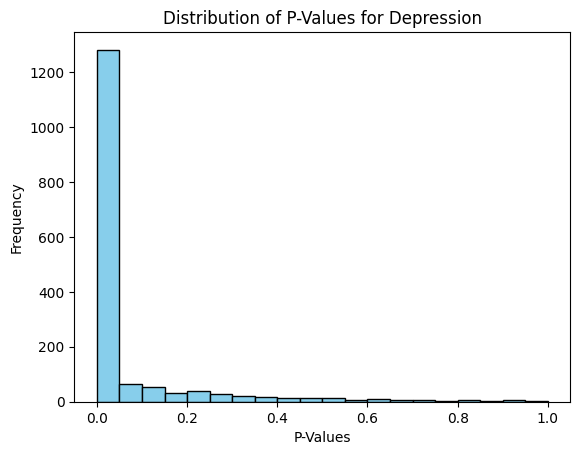

Number of edges greater than 0.05: 351
Number of edges less than or equal to 0.05: 1281


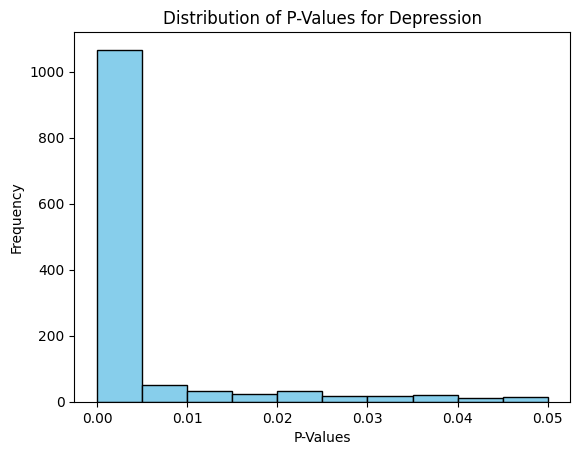

In [2]:
df = pd.read_csv('data/network results/combined_results_1000.csv')
df_depr_plot = df[df['Comparison'] != 'CVD vs NMR']
p_value_list_depr = df_depr_plot['P-Value'].tolist()

plt.hist(p_value_list_depr, bins=20, color='skyblue', edgecolor='black', range=(0, 1))
plt.xlabel('P-Values')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for Depression')
plt.savefig('plots/depr_p_val.png', dpi=300)
plt.show()

threshold = 0.05
greater_than_thresh_depr = len([p_value for p_value in p_value_list_depr if p_value > threshold])
less_than_thresh_depr = len([p_value for p_value in p_value_list_depr if p_value < threshold])
print("Number of edges greater than 0.05:", greater_than_thresh_depr)
print("Number of edges less than or equal to 0.05:", less_than_thresh_depr)

plt.hist(p_value_list_depr, bins=10, color='skyblue', edgecolor='black', range=(0, 0.05))
plt.xlabel('P-Values')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for Depression')
plt.savefig('plots/depr_p_val_close.png', dpi=300)
plt.show()

Plotting P-values: CVD

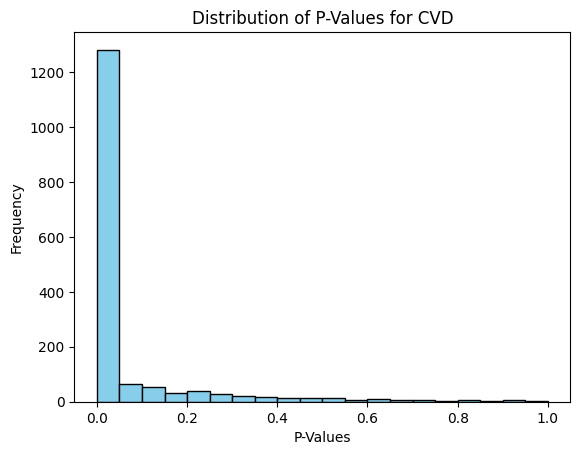

Number of edges greater than 0.05: 351
Number of edges less than or equal to 0.05: 1281


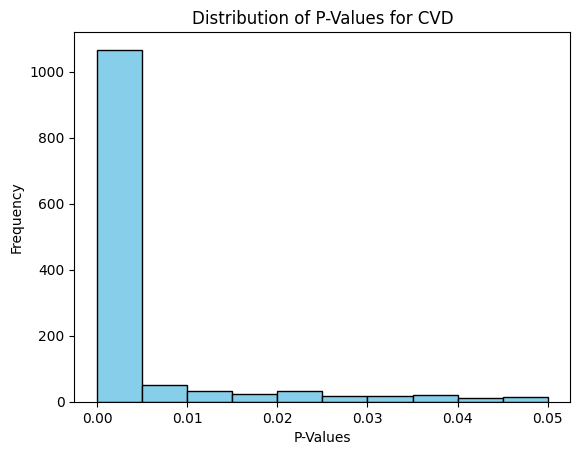

In [3]:
df = pd.read_csv('data/network results/combined_results_1000.csv')
df_cvd_plot = df[df['Comparison'] != 'Depression vs NMR']
p_value_list_cvd = df_depr_plot['P-Value'].tolist()

plt.hist(p_value_list_cvd, bins=20, color='skyblue', edgecolor='black', range=(0, 1))
plt.xlabel('P-Values')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for CVD')
plt.savefig('plots/cvd_p_val.png', dpi=300)
plt.show()


threshold = 0.05
greater_than_thresh_cvd = len([p_value for p_value in p_value_list_cvd if p_value > threshold])
less_than_thresh_cvd = len([p_value for p_value in p_value_list_cvd if p_value < threshold])
print("Number of edges greater than 0.05:", greater_than_thresh_cvd)
print("Number of edges less than or equal to 0.05:", less_than_thresh_cvd)

plt.hist(p_value_list_cvd, bins=10, color='skyblue', edgecolor='black', range=(0, 0.05))
plt.xlabel('P-Values')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for CVD')
plt.savefig('plots/cvd_p_val_close.png', dpi=300)
plt.show()


In [10]:
df = pd.read_csv('data/network results/combined_results_1000.csv')
df[['Feature1', 'Feature2']] = df['Feature Pair'].str.extract(r"\('([^']*)', '([^']*)'\)")
df['Depression Attribute'] = df['Feature1'].where(df['Comparison'].str.startswith('Depression'))
df['CVD Attribute'] = df['Feature1'].where(df['Comparison'].str.startswith('CVD'))
df['CVD Attribute'] = df['CVD Attribute'].fillna(df['Feature2'].where(df['Comparison'].str.endswith('CVD')))
df['NMR Attribute'] = df['Feature2'].where(df['Comparison'].str.endswith('NMR'))

df.drop(columns=['Feature Pair', 'Feature1', 'Feature2'], inplace=True)
df.to_csv('data/network results/combined_results_1000_edited.csv', index=False)

df_filtered = df[df['P-Value'] < 0.05]
print(df_filtered)
df_filtered.to_csv('data/network results/combined_results_1000_filt.csv', index=False)

      Chi-Square Statistic         Comparison        P-Value  \
0               127.687056  Depression vs CVD   1.314128e-29   
1               489.084189  Depression vs CVD  2.254668e-108   
2               557.080923  Depression vs CVD  3.627600e-123   
3              3419.132961  Depression vs CVD   0.000000e+00   
4               389.956653  Depression vs CVD   8.458903e-87   
...                    ...                ...            ...   
1762           2473.994283         CVD vs NMR   0.000000e+00   
1763           1846.006431         CVD vs NMR   0.000000e+00   
1764           1609.765432         CVD vs NMR   0.000000e+00   
1765           1188.293021         CVD vs NMR  4.083136e-250   
1766           2150.881077         CVD vs NMR   0.000000e+00   

       Depression Attribute CVD Attribute                        NMR Attribute  
0     Depressed.At.Baseline           CVD                                  NaN  
1                Loneliness           CVD                            